In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
x = [[1,1]]
y = [[0]]

In [3]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

In [4]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2, 3)
    self.hidden_layer_activation = nn.Sigmoid()
    self.hidden_to_output_layer = nn.Linear(3, 1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

model = MyModel().to(device)

In [5]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=1, shuffle=True)

In [6]:
!pip install torch_summary
from torchsummary import summary

In [7]:
summary(model, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 3]                   9
├─Sigmoid: 1-2                           [-1, 3]                   --
├─Linear: 1-3                            [-1, 1]                   4
Total params: 13
Trainable params: 13
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [8]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.005)
import time
loss_history = []
train_accuracies = []
start = time.time()
for _ in range(200):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)

    output = (model(ix) > 0.1).float()
    correct = (output == iy).float().sum()
    train_accuracies.append(correct)

end = time.time()
print(end - start)

0.31792640686035156


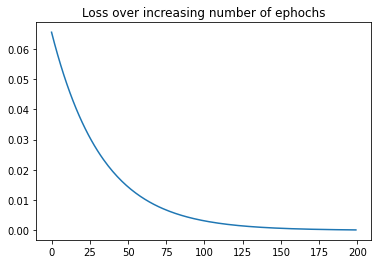

In [9]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title('Loss over increasing number of ephochs')
plt.show()

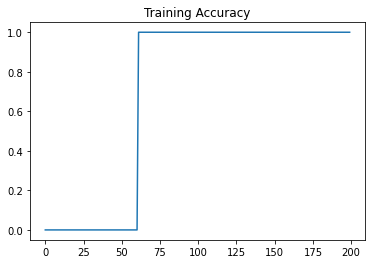

In [10]:
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.show()

In [11]:
val = [1, 1]
val = torch.tensor(val).float()

In [12]:
model(val.to(device))

tensor([0.0122], device='cuda:0', grad_fn=<AddBackward0>)

In [13]:
val.sum(-1)

tensor(2.)

In [14]:
for weight in model.parameters():
  print(weight.data)

tensor([[-0.0486, -0.5011],
        [-0.4182,  0.1393],
        [ 0.3465,  0.0654]], device='cuda:0')
tensor([ 0.1690, -0.6506, -0.4812], device='cuda:0')
tensor([[-0.1162, -0.5338, -0.0038]], device='cuda:0')
tensor([0.2123], device='cuda:0')
